In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.csv")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [48]:
dataset.shape


(2919, 13)

In [49]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


/var/folders/v6/2b7xty_d1_n1zvcd9g69f8840000gn/T/ipykernel_73640/4276653675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

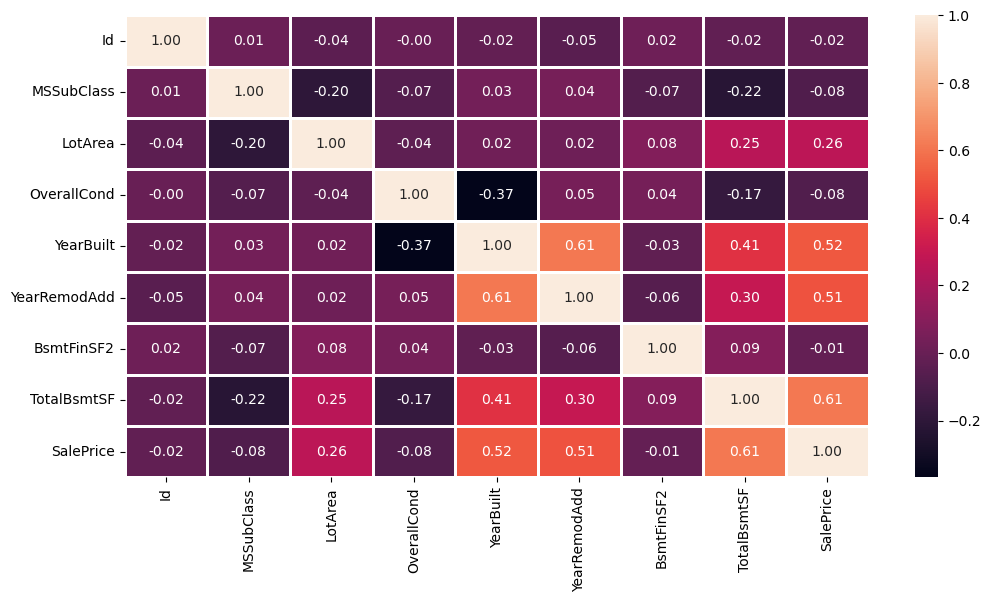

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
# 			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

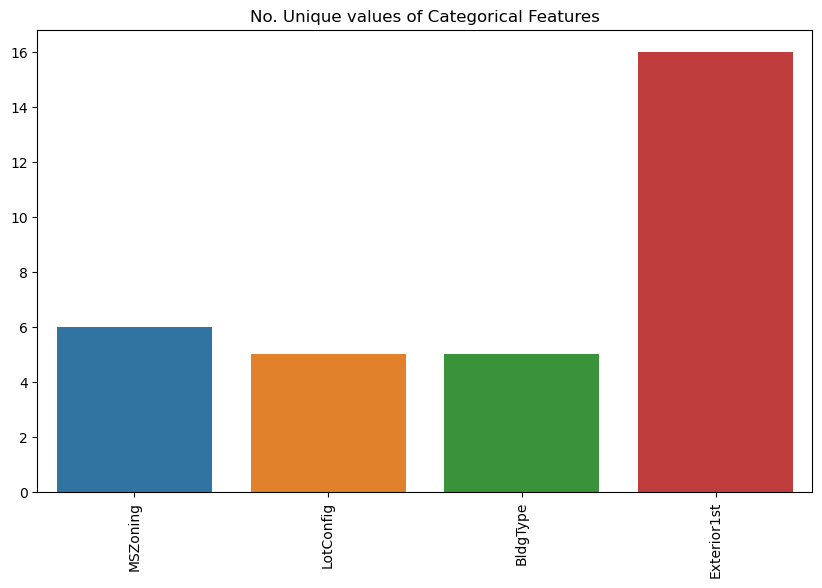

In [51]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)



In [52]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [53]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [54]:
new_dataset = dataset.dropna()
new_dataset.isnull().sum()



MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [55]:
#Encoding Categorical Data
s = (new_dataset.dtypes == 'object')
categorical_cols = list(s[s].index)

# Use pandas get_dummies to apply one-hot encoding
new_dataset_encoded = pd.get_dummies(new_dataset, columns=categorical_cols)


In [56]:
 from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = new_dataset_encoded.drop(['SalePrice'], axis=1)
Y = new_dataset_encoded['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [57]:
from sklearn import svm
from sklearn.metrics import r2_score

# Assuming you have already defined and split your X_train, Y_train, X_valid, and Y_valid

# Create and train the SVR model
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)

# Make predictions on the validation set
Y_pred = model_SVR.predict(X_valid)

# Calculate regression metrics

r2 = r2_score(Y_valid, Y_pred)
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

# Print the regression metrics

print(f"R-squared (R2) Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2) Score: 1.6224524190810996e-06
Mean Absolute Percentage Error (MAPE): 0.18705129318704236


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already defined and split your X_train, Y_train, X_valid, and Y_valid

# Create and train the RandomForestRegressor model
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)

# Make predictions on the validation set
Y_pred = model_RFR.predict(X_valid)

# Calculate regression metrics

r2 = r2_score(Y_valid, Y_pred)
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

# Print the regression metrics
print(f"R-squared (R2) Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


R-squared (R2) Score: 0.274779002094657
Mean Absolute Percentage Error (MAPE): 0.1911615491058697


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Assuming you have already defined and split your X_train, Y_train, X_valid, and Y_valid

# Create and train the Linear Regression model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

# Make predictions on the validation set
Y_pred = model_LR.predict(X_valid)

# Calculate MAPE
mape = mean_absolute_percentage_error(Y_valid, Y_pred)

# Calculate R-squared (R2) Score
r2 = r2_score(Y_valid, Y_pred)

# Print both MAPE and R2
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Percentage Error (MAPE): 0.187416838415999
R-squared (R2) Score: 0.3741422704574455
